In [5]:
import glob
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import json

# background:0,0,0::
# burn:190,97,29::
# skin:99,169,77::

In [6]:
file_list = glob.glob("./Dataset/labeledburnsegments/SegmentationClass/*.png")
print(len(file_list))

200


In [7]:
practice_file = './Dataset/labeledburnsegments/SegmentationClass/img100.png'
practice_file2 = practice_file.replace("SegmentationClass", "SegmentationObject")
practice_image = cv2.imread(practice_file)
practice_image = cv2.cvtColor(practice_image, cv2.COLOR_BGR2RGB)
practice_image2 = cv2.imread(practice_file2)
practice_image2 = cv2.cvtColor(practice_image2, cv2.COLOR_BGR2RGB)
print(practice_file)

./Dataset/labeledburnsegments/SegmentationClass/img100.png


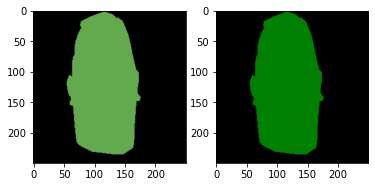

In [8]:
f, axarr = plt.subplots(1,2)
axarr[0].imshow(practice_image)
axarr[1].imshow(practice_image2)
plt.show()

In [9]:
print(type(practice_image))
unique_colors = np.unique(practice_image.reshape(-1, practice_image.shape[2]), axis=0)
print(len(unique_colors))
print(unique_colors)

<class 'numpy.ndarray'>
2
[[  0   0   0]
 [ 99 169  77]]


In [10]:
def load_rgb_image(filename):
    return cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2RGB)

In [11]:
images_without_burns = []
print("These Images have no burns:")
file_list.sort()
for filename in file_list:
    break
    tmp_img = load_rgb_image(filename)
    if len(np.unique(tmp_img.reshape(-1, tmp_img.shape[2]), axis=0)) != 3:
        images_without_burns.append(os.path.basename(filename))
        print(os.path.basename(filename))

These Images have no burns:


In [12]:
print(len(images_without_burns))
test_segment = [76.2, 60.7, 87.7, 54.4, 94.0, 46.8, 102.9, 41.5, 116.41, 40.55, 121.03, 48.47, 120.37, 55.07, 125.32, 60.34, 127.63, 68.26, 123.67, 75.18, 118.39, 77.49, 116.08, 84.09, 111.46, 90.03, 102.89, 96.62, 99.92, 97.28, 94.31, 89.37, 83.1, 86.4, 81.45, 80.46, 74.85, 71.56]
test_segment_verted  = []
for index, num in enumerate(test_segment):
    if index % 2 == 0:
        test_segment_verted.append((test_segment[index], test_segment[index + 1]))
tmp_img = practice_image.copy()
test_segment_verted = np.array(test_segment_verted, dtype=np.int32)
print(test_segment_verted)

0
[[ 76  60]
 [ 87  54]
 [ 94  46]
 [102  41]
 [116  40]
 [121  48]
 [120  55]
 [125  60]
 [127  68]
 [123  75]
 [118  77]
 [116  84]
 [111  90]
 [102  96]
 [ 99  97]
 [ 94  89]
 [ 83  86]
 [ 81  80]
 [ 74  71]]


int32
(19, 2)


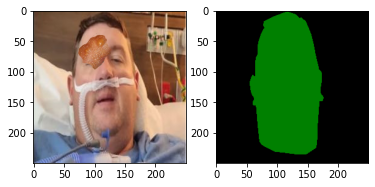

In [13]:
real_img = load_rgb_image('./Dataset/labeledburnsegments/JPEGImages/img100.jpg')
print(test_segment_verted.dtype)
print(test_segment_verted.shape)

f, axarr = plt.subplots(1,2)
axarr[0].imshow(real_img)
axarr[1].imshow(practice_image2)
plt.show()

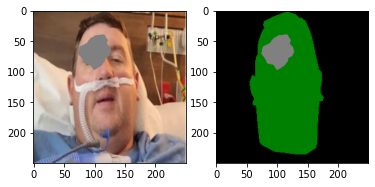

In [14]:
cv2.fillPoly(real_img, pts = [test_segment_verted], color =(128,128,128))
cv2.fillPoly(practice_image2, pts = [test_segment_verted], color =(128,128,128))

f, axarr = plt.subplots(1,2)
axarr[0].imshow(real_img)
axarr[1].imshow(practice_image2)
plt.show()

In [15]:
metadata_file = './Dataset/coco/annotations/instances_default.json'
# read file
with open(metadata_file, 'r') as myfile:
    data=myfile.read()

# parse file
obj = json.loads(data)
print(obj)


{'licenses': [{'name': '', 'id': 0, 'url': ''}], 'info': {'contributor': '', 'date_created': '', 'description': '', 'url': '', 'version': '', 'year': ''}, 'categories': [{'id': 1, 'name': 'skin', 'supercategory': ''}, {'id': 2, 'name': 'burn', 'supercategory': ''}], 'images': [{'id': 1, 'width': 250, 'height': 250, 'file_name': 'img100.jpg', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': 0}, {'id': 2, 'width': 250, 'height': 250, 'file_name': 'img51.jpg', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': 0}, {'id': 3, 'width': 250, 'height': 250, 'file_name': 'img52.jpg', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': 0}, {'id': 4, 'width': 250, 'height': 250, 'file_name': 'img53.jpg', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': 0}, {'id': 5, 'width': 250, 'height': 250, 'file_name': 'img54.jpg', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': 0}, {'id': 6, 'width': 250, 'height': 250, 'file_name':

In [16]:
image_folder = '/Users/zacharyobrien/BurnEstimation/Dataset/coco/images/'
id_to_filename = {}
for image_obj in obj['images']:
    image_filename = image_folder + image_obj['file_name']
    id_to_filename[image_obj['id']] = image_filename
    print(image_filename)

/Users/zacharyobrien/BurnEstimation/Dataset/coco/images/img100.jpg
/Users/zacharyobrien/BurnEstimation/Dataset/coco/images/img51.jpg
/Users/zacharyobrien/BurnEstimation/Dataset/coco/images/img52.jpg
/Users/zacharyobrien/BurnEstimation/Dataset/coco/images/img53.jpg
/Users/zacharyobrien/BurnEstimation/Dataset/coco/images/img54.jpg
/Users/zacharyobrien/BurnEstimation/Dataset/coco/images/img55.jpg
/Users/zacharyobrien/BurnEstimation/Dataset/coco/images/img56.jpg
/Users/zacharyobrien/BurnEstimation/Dataset/coco/images/img57.jpg
/Users/zacharyobrien/BurnEstimation/Dataset/coco/images/img58.jpg
/Users/zacharyobrien/BurnEstimation/Dataset/coco/images/img59.jpg
/Users/zacharyobrien/BurnEstimation/Dataset/coco/images/img60.jpg
/Users/zacharyobrien/BurnEstimation/Dataset/coco/images/img61.jpg
/Users/zacharyobrien/BurnEstimation/Dataset/coco/images/img62.jpg
/Users/zacharyobrien/BurnEstimation/Dataset/coco/images/img63.jpg
/Users/zacharyobrien/BurnEstimation/Dataset/coco/images/img64.jpg
/Users/za

segmentation length is: 1
image name is: /Users/zacharyobrien/BurnEstimation/Dataset/coco/images/img100.jpg
length of polygon is: 48


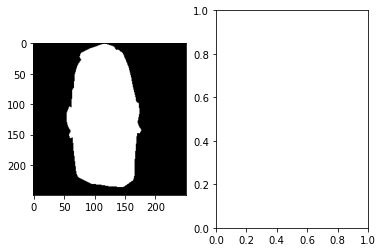

In [20]:
annotation_folder = image_folder.replace('images', 'crafted_masks')
mask_example = None
for annotation in obj['annotations']:
    image_number = annotation['image_id']
    image_filename = id_to_filename[image_number]
    tmp_file = cv2.imread(image_filename)
    mask_placeholder = np.zeros((tmp_file.shape[0], tmp_file.shape[1], 1))
    tmp_segment = annotation['segmentation']
    print("segmentation length is:", len((tmp_segment)))
    print("image name is:", image_filename)
    data_point_list = tmp_segment[0]
    tmp_xy_list = []
    for index, num in enumerate(data_point_list):
        if index % 2 == 0:
            tmp_xy_list.append((data_point_list[index], data_point_list[index + 1]))
    tmp_xy_list = np.array(tmp_xy_list, dtype=np.int32)
    cv2.fillPoly(mask_placeholder, pts = [tmp_xy_list], color =(255))

    mask_example = mask_placeholder
    print("length of polygon is:", len(tmp_xy_list))
    break

f, axarr = plt.subplots(1,2)
axarr[0].imshow(mask_example, cmap='gray')
plt.show()